# Init.

In [1]:
from sklearn.datasets import load_breast_cancer  # Built-in dataset: breast cancer classification
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.linear_model import LogisticRegression   # ML model: Logistic Regression (linear classifier)
from sklearn.tree import DecisionTreeClassifier       # ML model: Decision Tree (non-linear classifier)
from sklearn.metrics import classification_report, confusion_matrix  # To evaluate model performance
import math   # For mathematical operations (not directly needed yet)

# For visualization (we may use it later to plot data)
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.tree import plot_tree

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")


# Data Prep.

In [2]:
# Menggunakan built-in Breast Cancer dataset dari sklearn.
# Mengandung informasi terkait dengan sel tumor breast cancer (fitur numerikal)
# Target (malignant = cancerous, benign = non-cancerous).
data_loader = load_breast_cancer(as_frame=True)  # 'as_frame=True' memberikan pandas DataFrame
data_loader

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [3]:
# Dataset disimpan dalam objek seperti kamus dengan beberapa kunci.
data_loader.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Targetnya adalah apa yang mau kita prediksi: cancerous atau tidak.
data_loader["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# Setiap dataset juga disertai deskripsi penjelasan.
print(data_loader["DESCR"])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# Preview dataset
data_loader["data"]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# 'Frame' menggabungkan fitur + target menjadi satu DataFrame untuk penanganan yang lebih mudah.
data = data_loader.frame #data_loader
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# EDA (Simple)

In [8]:
# Memuat informasi data
data.info(31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# Mendapatkan variabel-variabel kategorikal
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [10]:
# Mendapatkan variabel-variabel Numerik
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [11]:
# Mendapat variabel-variabel integer
t = (data.dtypes == "int")
num_cols = list(t[t].index)

print("Integer variables:")
print(num_cols)

Integer variables:
['target']


In [12]:
# Mengecek jumlah missing value 
print("Jumlah missing value: \n" ,data.isnull().sum().sum())

Jumlah missing value: 
 0


In [13]:
# Mengecek jumlah data duplikat
print("Jumlah data duplikat: \n" ,data.duplicated().sum().sum())

Jumlah data duplikat: 
 0


In [14]:
# Mengecek jumlah sampel yang dimiliki setiap kelas target
# (0 = malignant, 1 = benign) dari metadata
data.target.value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

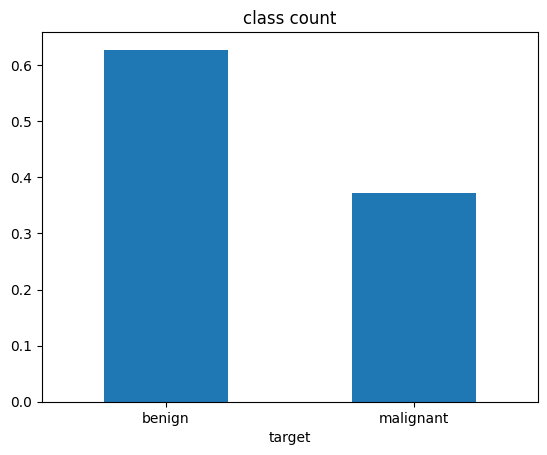

In [15]:
# Membuat label target lebih mudah untuk dipahami (mengganti 0/1 menjadi kata-kata)
target_meaning = {
    0: "malignant",
    1: "benign",
}

# Menunjukkan distribusi kelas dengan bar chart
data.target.replace(target_meaning).value_counts(normalize=True).plot(kind="bar", rot=0, title="class count");

In [16]:
# Membuat rangkuman statistik (mean, std, min, max, quartil) untuk setiap fitur
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


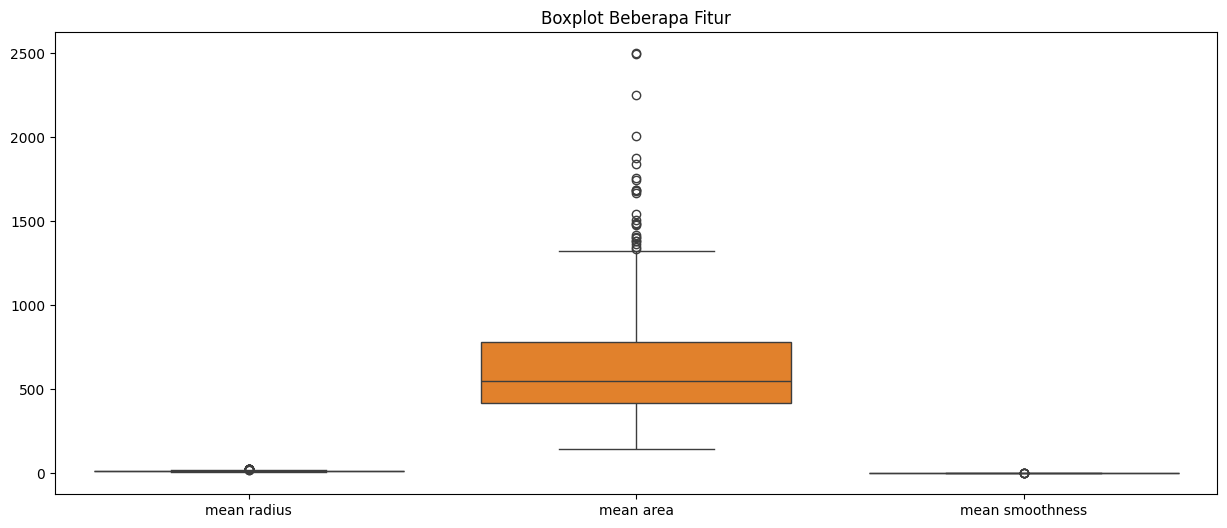

In [17]:
# Mengecek outlier dari boxplot beberapa fitur
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(data[['mean radius', 'mean area', 'mean smoothness']])
plt.title("Boxplot Beberapa Fitur")
plt.show()


In [18]:
# Mengecek korelasi dari setiap fitur dengan target
# (semakin mendekati 1 atau -1 -> memperkuat relasi)
data_loader["frame"].corr().apply(abs).loc["target"].sort_values(ascending=False)
#data_loader["frame"].corr().loc["target"] #.apply(abs).loc["target"].sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

array([[<Axes: title={'center': 'worst concave points'}>]], dtype=object)

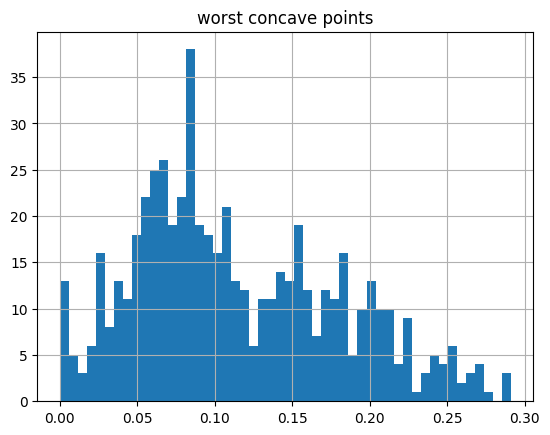

In [19]:
# Plot histogram dari fitur 'worst concave points'
# "worst concave points" adalah fitur yang paling berkorelasi dengan target
data[["worst concave points"]].hist(bins=50)

<Axes: xlabel='worst concave points', ylabel='Count'>

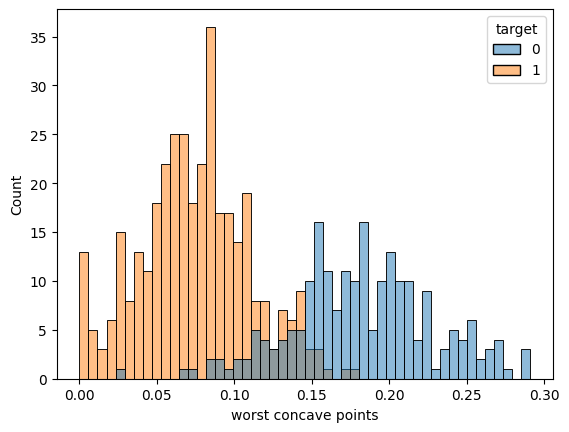

In [20]:
# Membandingkan distribusi dari "worst concave points" di antara malignant dan benign tumor
sns.histplot(
    data=data,
    x="worst concave points",
    hue="target",
    bins=50
)

Notes:  
> Struktur data:
- 569 sampel, 30 fitur numerik, 1 kolom target.
> Target (Y):
- 0 = Malignant (ganas)
- 1 = Benign (jinak)
> Distribusi: 
- 212 ganas (37%), 357 jinak (63%) → data tidak seimbang sempurna, tetapi masih cukup proporsional untuk klasifikasi tanpa perlu balancing tambahan.
> Kualitas data:
- Tidak ada missing value atau duplikasi.
- Semua fitur numerik kontinu.
- Skala fitur berbeda → perlu standardisasi (scaling).
> Korelasi & fitur penting:
- Beberapa fitur sangat berkorelasi tinggi dengan target.
- Fitur paling berpengaruh: worst concave points, worst perimeter, mean concave points, worst radius, mean perimeter
> Outlier:
- Ada sedikit nilai ekstrem (terutama pada mean area). Namun tidak dihapus, hanya perlu dinormalisasi.
> Kesimpulan awal:
- Data bersih dan perlu dipersiapkan untuk modeling.
- PCA dapat digunakan untuk mengurangi fitur tanpa harus kehilangan banyak informasi.

# Prep

In [21]:
# Memilih fitur (kolom) untuk training
# Untuk sekarang kita hanya menggunakan satu fitur: "worst concave points"
# Setelahnya, kita bisa memilih beberapa skenario fitur: data.columns[:-1]
features = ['worst concave points']
features

['worst concave points']

In [22]:
# Kolom terakhir di DataFrame adalah target (0 = malignant, 1 = benign)
target = data.columns[-1]
target

'target'

In [23]:
# Memisahkan dataset menjadi inputs (X) dan output/labels (y)
X = data[features]   # Fitur
y = data[target]     # Target
display(X)           # Menunjukkan nilai fitur
display(y)           # Menunjukkan nilai target

,worst concave points
0,0.2654
1,0.1860
2,0.2430
3,0.2575
4,0.1625
...,...
564,0.2216
565,0.1628
566,0.1418
567,0.2650


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Split Data

In [24]:
# Split data menjadi set training dan testing
# - 80% untuk training (cocok untuk model)
# - 20% untuk testing (untuk mengecek model performance pada data yang tidak terlihat)
# random_state=42 ensures reproducibility (selalu mendapat split yang sama)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# [Optional] Preview train set (hanya fitur)
X_train

,worst concave points
68,0.17500
181,0.29030
63,0.05087
248,0.06136
60,0.02579
...,...
71,0.04786
106,0.12180
270,0.03333
435,0.18270


In [25]:
# [Optional] Preview test set (hanya fitur)
X_test

,worst concave points
204,0.10150
70,0.17890
131,0.15140
431,0.07370
540,0.06918
...,...
486,0.07828
75,0.15200
249,0.09608
238,0.08219


In [26]:
# [Optional] Preview train set (hanya target)
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int64

In [27]:
# [Optional] Preview test set (hanya target)
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int64

In [28]:
# Skenario 1: 1 fitur
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

print("\nBentuk data skenario 1 (1 fitur):")
print(f"{X_train_1.shape}\n")
print("Data train skenario 1 (1 fitur):")
X_train_1


Bentuk data skenario 1 (1 fitur):
(455, 1)

Data train skenario 1 (1 fitur):


,worst concave points
68,0.17500
181,0.29030
63,0.05087
248,0.06136
60,0.02579
...,...
71,0.04786
106,0.12180
270,0.03333
435,0.18270


In [29]:
# Skenario 2: Semua fitur + PCA (2 komponen utama)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Gunakan semua kolom kecuali target
X_all = data.drop(columns=[target])
y_all = data[target]

# Split data ulang supaya setara
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Standarisasi data sebelum PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_all)
X_test_scaled = scaler.transform(X_test_all)

# PCA dengan 2 komponen utama
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA menjelaskan {pca.explained_variance_ratio_.sum():.2%} dari total variansi data.")
print(f"\nBentuk data skenario 2 (Semua fitur + PCA) : {X_train_pca.shape}")
print(f"\nData train skenario 2 (Semua fitur + PCA) :\n", X_train_pca)

PCA menjelaskan 63.00% dari total variansi data.

Bentuk data skenario 2 (Semua fitur + PCA) : (455, 2)

Data train skenario 2 (Semua fitur + PCA) :
 [[ 4.24490333e+00  9.13142795e+00]
 [ 9.05375518e+00  4.75309554e-01]
 [-2.27537401e+00  3.27847097e+00]
 [-2.51045303e+00  7.43742636e-01]
 [-2.30284792e+00  2.66515505e+00]
 [ 4.13994739e+00  2.91476361e+00]
 [ 2.99560854e+00  4.20447521e+00]
 [-3.21149460e+00 -3.73153521e-01]
 [-2.37592825e+00  3.33787948e-02]
 [ 3.38983726e+00 -2.36510231e+00]
 [-8.93881293e-01  9.60683891e-01]
 [ 4.33032435e+00 -4.03761003e+00]
 [ 3.18617027e+00  1.47231956e+00]
 [-2.63966718e+00  1.46297451e+00]
 [-3.11866687e+00 -1.43889514e+00]
 [ 5.00491144e+00 -1.16856216e+00]
 [ 9.21099216e+00  1.75576089e+00]
 [ 5.97157908e+00  3.48794503e+00]
 [-2.78508674e+00 -2.43552252e+00]
 [-3.28557710e+00 -4.26562359e-02]
 [-2.05551632e+00 -2.42605467e+00]
 [ 4.78576830e+00  3.19275729e+00]
 [-4.50204054e-01  1.30156054e-01]
 [-2.18628605e+00  2.04858538e+00]
 [ 1.27513

In [30]:
# Skenario 3: 2–5 fitur terbaik berdasarkan korelasi dengan target
# Hitung korelasi semua fitur terhadap target
corr = data.corr()['target'].drop('target').abs().sort_values(ascending=False)
top_features = list(corr.index[:5])   # ambil 5 fitur dengan korelasi tertinggi
print("Fitur terpilih (top 5):\n", top_features)

# Gunakan fitur-fitur tersebut
X_train_sel = X_train_all[top_features]
X_test_sel = X_test_all[top_features]

print(f"\nBentuk data skenario 3 (2–5 fitur terpilih) : {X_train_sel.shape}")
print(f"\nData train skenario 3 (2–5 fitur terpilih) :")
X_train_sel

Fitur terpilih (top 5):
 ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter']

Bentuk data skenario 3 (2–5 fitur terpilih) : (455, 5)

Data train skenario 3 (2–5 fitur terpilih) :


,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter
68,0.17500,65.50,0.04375,10.310,58.79
181,0.29030,176.50,0.14960,26.680,142.70
63,0.05087,65.59,0.02180,10.010,59.20
248,0.06136,77.98,0.01615,12.250,68.01
60,0.02579,69.86,0.01290,11.020,64.55
...,...,...,...,...,...
71,0.04786,62.56,0.02872,9.733,58.79
106,0.12180,85.51,0.03485,13.140,75.17
270,0.03333,94.44,0.00625,14.910,90.30
435,0.18270,113.90,0.06463,17.040,91.12


>Pemilihan fitur:

- 1 fitur: Menggunakan fitur paling berpengaruh/berkorelasi dengan target, yaitu 'worst concave points'.
- Semua fitur + PCA: Digunakan untuk mereduksi dimensi agar model lebih efisien.
- 2–5 fitur terpilih: Dipilih yang memiliki korelasi dan relevansi tinggi terhadap target, antara lain 'worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', dan 'mean perimeter'.
- Split data: Data dibagi menjadi 80% training dan 20% testing (dengan random_state=42) agar hasil dapat direproduksi.

# Modeling & Evaluation

In [31]:
# Kombinasi 1: 1 Fitur + Model Baseline
# Baseline model: menebak kelas mayoritas
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train_1, y_train_all)
y_pred_base = baseline.predict(X_test_1)

acc_base = accuracy_score(y_test_all, y_pred_base)
print(f"Akurasi Baseline (1 Fitur): {acc_base:.3f}\n")
conf_matrix = confusion_matrix(y_test_all, y_pred_base)
print(classification_report(y_test_all, y_pred_base))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline (1 Fitur)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'DummyClassifier' is not defined

Akurasi Logistic Regression (1 Fitur): 0.816

              precision    recall  f1-score   support

           0       1.00      0.51      0.68        43
           1       0.77      1.00      0.87        71

    accuracy                           0.82       114
   macro avg       0.89      0.76      0.77       114
weighted avg       0.86      0.82      0.80       114



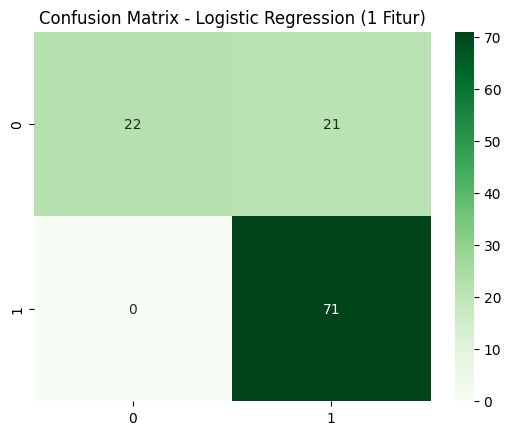

In [ ]:
# Kombinasi 2: 1 Fitur + Model Linear (Logistic Regression)

lr_1 = LogisticRegression(random_state=42)
lr_1.fit(X_train_1, y_train_all)
y_pred_lr_1 = lr_1.predict(X_test_1)

acc_lr_1 = accuracy_score(y_test_all, y_pred_lr_1)
print(f"Akurasi Logistic Regression (1 Fitur): {acc_lr_1:.3f}\n")
print(classification_report(y_test_all, y_pred_lr_1))
sns.heatmap(confusion_matrix(y_test_all, y_pred_lr_1), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression (1 Fitur)')
plt.show()


Akurasi Decision Tree (1 Fitur): 0.912

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



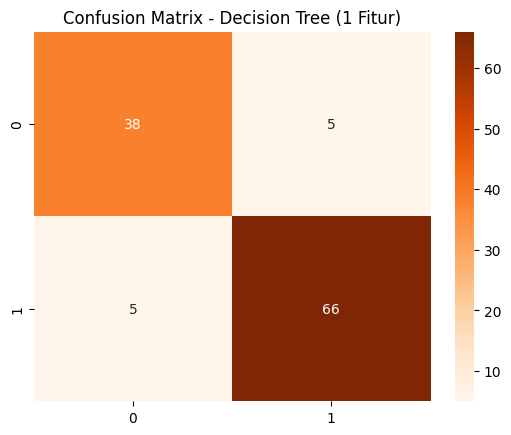

In [ ]:
# Kombinasi 3: 1 Fitur + Model Non-linear (Decision Tree)

dt_1 = DecisionTreeClassifier(random_state=42)
dt_1.fit(X_train_1, y_train_all)
y_pred_dt_1 = dt_1.predict(X_test_1)

acc_dt_1 = accuracy_score(y_test_all, y_pred_dt_1)
print(f"Akurasi Decision Tree (1 Fitur): {acc_dt_1:.3f}\n")
print(classification_report(y_test_all, y_pred_dt_1))

sns.heatmap(confusion_matrix(y_test_all, y_pred_dt_1), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree (1 Fitur)')
plt.show()


Akurasi Logistic Regression (PCA): 0.991

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



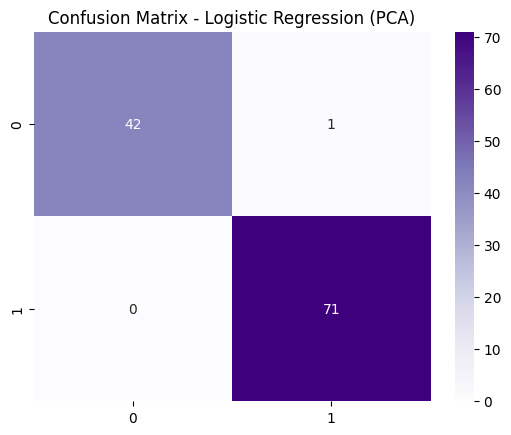

In [ ]:
# Kombinasi 4: Semua Fitur + PCA + Model Linear (Logistic Regression)

pca_lr = LogisticRegression(max_iter=1000, random_state=42)
pca_lr.fit(X_train_pca, y_train_all)
y_pred_pca_lr = pca_lr.predict(X_test_pca)

acc_pca_lr = accuracy_score(y_test_all, y_pred_pca_lr)
print(f"Akurasi Logistic Regression (PCA): {acc_pca_lr:.3f}\n")
print(classification_report(y_test_all, y_pred_pca_lr))

sns.heatmap(confusion_matrix(y_test_all, y_pred_pca_lr), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression (PCA)')
plt.show()


Akurasi Decision Tree (PCA): 0.956

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



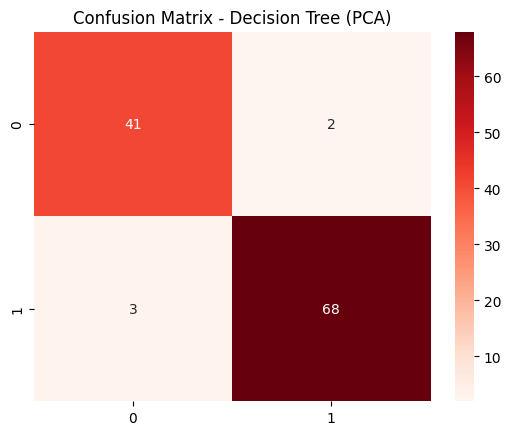

In [ ]:
# Kombinasi 5: Semua Fitur + PCA + Model Non-Linear (Decision Tree)

pca_dt = DecisionTreeClassifier(random_state=42)
pca_dt.fit(X_train_pca, y_train_all)
y_pred_pca_dt = pca_dt.predict(X_test_pca)

acc_pca_dt = accuracy_score(y_test_all, y_pred_pca_dt)
print(f"Akurasi Decision Tree (PCA): {acc_pca_dt:.3f}\n")
print(classification_report(y_test_all, y_pred_pca_dt))

sns.heatmap(confusion_matrix(y_test_all, y_pred_pca_dt), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Decision Tree (PCA)')
plt.show()


Akurasi Logistic Regression (2–5 Fitur): 0.974

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



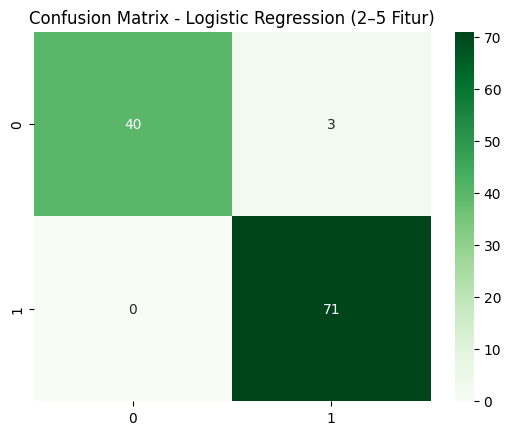

In [ ]:
# Kombinasi 6: 2-5 Fitur + Model Linear (Logistic Regression)

lr_sel = LogisticRegression(max_iter=1000, random_state=42)
lr_sel.fit(X_train_sel, y_train_all)
y_pred_lr_sel = lr_sel.predict(X_test_sel)

acc_lr_sel = accuracy_score(y_test_all, y_pred_lr_sel)
print(f"Akurasi Logistic Regression (2–5 Fitur): {acc_lr_sel:.3f}\n")
print(classification_report(y_test_all, y_pred_lr_sel))

sns.heatmap(confusion_matrix(y_test_all, y_pred_lr_sel), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression (2–5 Fitur)')
plt.show()


Akurasi Decision Tree (2–5 Fitur): 0.939

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



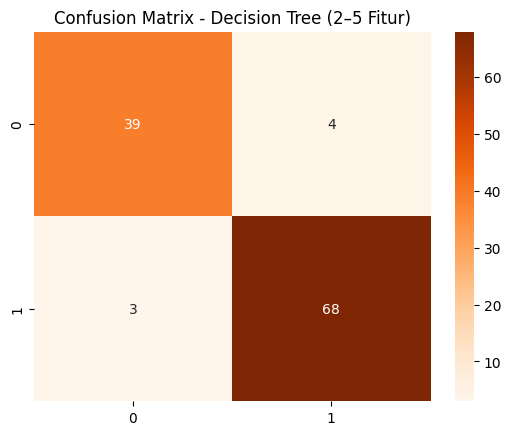

In [ ]:
# Kombinasi 7: 2-5 Fitur + Model Non-Linear (Decision Tree)

dt_sel = DecisionTreeClassifier(random_state=42)
dt_sel.fit(X_train_sel, y_train_all)
y_pred_dt_sel = dt_sel.predict(X_test_sel)

acc_dt_sel = accuracy_score(y_test_all, y_pred_dt_sel)
print(f"Akurasi Decision Tree (2–5 Fitur): {acc_dt_sel:.3f}\n")
print(classification_report(y_test_all, y_pred_dt_sel))

sns.heatmap(confusion_matrix(y_test_all, y_pred_dt_sel), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree (2–5 Fitur)')
plt.show()


Hasil Akurasi Tiap Kombinasi:



,Scenario,Model,Accuracy
0,Semua Fitur + PCA,LogisticRegression,0.991228
1,2–5 Fitur Terpilih,LogisticRegression,0.973684
2,Semua Fitur + PCA,DecisionTreeClassifier,0.956140
3,2–5 Fitur Terpilih,DecisionTreeClassifier,0.938596
4,1 Fitur,DecisionTreeClassifier,0.912281
5,1 Fitur,LogisticRegression,0.815789
6,1 Fitur,DummyClassifier,0.622807


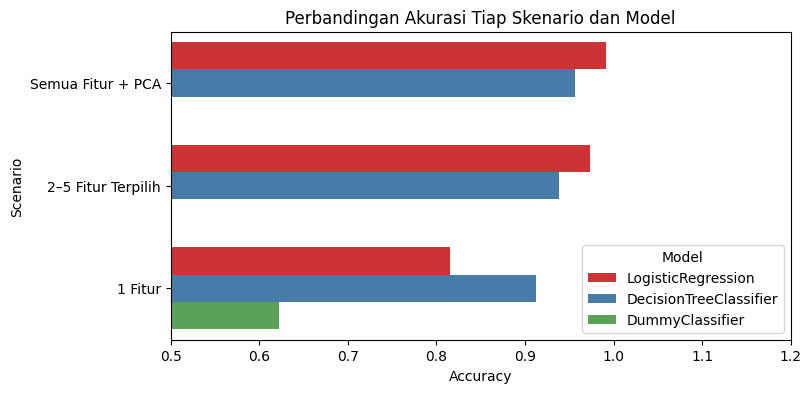

In [ ]:
# Membandingkan 7 kombinasi

results = []

# 1. 1 Fitur + Baseline
results.append(run_model(models["Baseline (Most Frequent)"], X_train_1, X_test_1, y_train, y_test, "1 Fitur"))

# 2. 1 Fitur + Logistic Regression
results.append(run_model(models["Logistic Regression"], X_train_1, X_test_1, y_train, y_test, "1 Fitur"))

# 3. 1 Fitur + Decision Tree
results.append(run_model(models["Decision Tree"], X_train_1, X_test_1, y_train, y_test, "1 Fitur"))

# 4. Semua fitur + PCA + Logistic Regression
results.append(run_model(models["Logistic Regression"], X_train_pca, X_test_pca, y_train_all, y_test_all, "Semua Fitur + PCA"))

# 5. Semua fitur + PCA + Decision Tree
results.append(run_model(models["Decision Tree"], X_train_pca, X_test_pca, y_train_all, y_test_all, "Semua Fitur + PCA"))

# 6. 2–5 fitur + Logistic Regression
results.append(run_model(models["Logistic Regression"], X_train_sel, X_test_sel, y_train_all, y_test_all, "2–5 Fitur Terpilih"))

# 7. 2–5 fitur + Decision Tree
results.append(run_model(models["Decision Tree"], X_train_sel, X_test_sel, y_train_all, y_test_all, "2–5 Fitur Terpilih"))

# Tabel hasil
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("Hasil Akurasi Tiap Kombinasi:\n")
display(results_df)

# Visualisasi
plt.figure(figsize=(8,4))
sns.barplot(x="Accuracy", y="Scenario", hue="Model", data=results_df, palette="Set1")
plt.title("Perbandingan Akurasi Tiap Skenario dan Model")
plt.xlim(0.5, 1.2)
plt.show()

>Model yang diuji:
- Baseline (DummyClassifier) → tebakan mayoritas.
- Logistic Regression → model linear.
- Decision Tree Classifier → model non-linear.

>Hasil Akurasi
- Logistic Regression + Semua fitur + PCA → akurasi 99.12% (tertinggi)
- Logistic Regression + 2–5 fitur terpilih → akurasi 97.36%
- Decision Tree + Semua fitur + PCA → akurasi 95.61%
- Baseline (DummyClassifier) → hanya 62.28%

>Kesimpulan Akhir
- Model terbaik yaitu Logistic Regression dengan semua fitur + PCA dengan akurasi 99%. Selain itu, struktur modelnya sederhana dan mudah diinterpretasikan serta tidak mudah overfitting dibanding Decision Tree.
- Fitur paling berpengaruh: 'worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', dan 'mean perimeter'.
- Penambahan PCA meningkatkan performa signifikan, menunjukkan bahwa data berdimensi tinggi tetap mengandung informasi penting yang dapat disarikan oleh PCA.
- Model linear sederhana (Logistic Regression) mampu bekerja sangat baik pada data dengan hubungan yang cukup jelas antar fitur.
- Fitur-fitur seperti concave points dan perimeter sangat berpengaruh dalam membedakan kanker ganas dan jinak.